# AI-MAILs
# 医療従事者のためのPython: PandasとSeaborn
Ver.20240630


### 参考にした資料
- [Pandas公式ドキュメント(英語)](https://pandas.pydata.org/docs/index.html)
- [Seaborn公式ドキュメント(英語)](https://seaborn.pydata.org/tutorial/introduction)

### 本日使用するデータ
- 糖尿病データセット https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
- 配布されているファイルの列名だけ編集し、2つに分割してExcelファイルに変換
- diabetes_demographics.xlsx: 年齢、性別、BMI、平均血圧
- diabetes_data.xlsx: T-Cho, LDL, HDL, T-Cho/HDL, TGの対数, 血糖, Y(1年間での進行度)

## 本日の内容
1. Pandas と Seaborn
2. Pandas
3. Seaborn

## Pandas と Seaborn
- Pandas: Pythonでデータ分析およびデータ操作をするためのツール "Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language."
- Seaborn: Pythonで統計データからグラフを簡便に作成するためのツール "Seaborn is a library for making statistical graphics in Python."

### Pandas と Seaborn, および os のインポート
- pandas は pd としてインポートされることが多い
- seaborn は sns としてインポートされることが多い
- ファイルを確認するために、os モジュールもインポートする


In [ ]:
# pandas は pd としてインポートされることが多い
import pandas as pd

# seaborn は sns (seaborn name space) としてインポートされることが多い
import seaborn as sns

# ファイルを確認するのは、os モジュールをインポートする
import os

### Google colaboratory でのデータの読み込み
- Google colaboratoryで作業をする時、通常は、左にある「ファイル」の下にデータをドラッグ & ドロップする
- そうすると、'ファイル名' でアクセスできる
- 今は、データをダウンロードして使用する
- 下のセルを実行すると、3つのxlsxファイルがダウンロードされる

<img src="https://www.nemotos.net/nb/img/colabo_files.png" width=300>

In [92]:
# 本日使うデータをダウンロードする
# ファイル名は diabetes_demographics.xlsx, diabetes_demographics_short.xlsx, diabetes_data.xlsx
# 
# (参考: 本講義においては本質的な事柄ではないのでわからなくても特に気にしなくて大丈夫です)
# ! はPythonからシェルで動かすプログラムを実行したい時につける
# [[ -f diabetes_demographics.xlsx ]] は、「diabetes_demographics.xlsx というファイルがあるか？」というシェルスクリプトのテスト文
# || は、戻り値が False ならば…　というコマンド
# wget はダウンロードするLinuxのプログラム

![[ -f diabetes_demographics.xlsx ]] || wget https://raw.githubusercontent.com/kytk/AI-MAILs/main/data/diabetes_demographics.xlsx
![[ -f diabetes_data.xlsx ]] || wget https://raw.githubusercontent.com/kytk/AI-MAILs/main/data/diabetes_data.xlsx
![[ -f diabetes_data_short.xlsx ]] || wget https://raw.githubusercontent.com/kytk/AI-MAILs/main/data/diabetes_data_short.xlsx


In [93]:
# osモジュールの中にある listdir() 関数で今のディレクトリの下にあるファイル一覧を表示できる
# 以下の3つのファイルがあることを確認
#   diabetes_demographics.xlsx
#   diabetes_data.xlsx
#   diabetes_data_short.xlsx

os.listdir()

['python_2_pandas_seaborn.ipynb.old',
 'diabetes_data.xlsx',
 '2023',
 'README.md',
 'python_1_intro.ipynb',
 'diabetes_data_short.xlsx',
 'diabetes_demographics.xlsx',
 'tmp',
 'LICENSE',
 'data',
 '.git',
 'python_2_pandas_seaborn.ipynb',
 'img',
 'diabetes_demographics_short.xlsx']

## Pandas
### Pandasでできることの例
- 表を扱う
- 表の記述統計量を出力する
- 表の一部を抽出する
- 複数の列の情報から新しい列を生成する
- PandasのデータフレームはSeabornでのグラフ作成にそのまま使用できる


### Pandas の用語: 「データフレーム Data Frame」
- 一般的な表をイメージすればよい
- Pandasでは、ひとつの表を「データフレーム」と呼ぶ
- 行: row; 列: column
- dataframe という名前を略して、 'df' という変数に代入することが多い

<img src="https://www.nemotos.net/nb/img/pandas_01.png" width=400>
図: pandas の公式ドキュメントから引用

### Pandas へのデータの読み込み
- Pandas は、csvファイルやexcelファイルを読み込むことができる
- Excelファイルはいくつか追加パッケージが必要なことがあるため、csvファイルがおすすめ
- Excel は、`pd.read_excel('excelファイル')` で読み込むことができる
- CSVは、`pd.read_csv('csvファイル')` で読み込むことができる
- IDなどは、インデックスとして指定すると取り回しが楽になる

In [94]:
# diabetes_demographics.xlsx を df_demographics として読み込む。第0列をインデックス列とする
df_demographics = pd.read_excel('diabetes_demographics.xlsx',index_col=0)

# diabetes_data.xlsx を df_data として読み込む。第0列をインデックス列とする
df_data = pd.read_excel('diabetes_data.xlsx',index_col=0)

# diabetes_data_short.xlsx を df_data_short として読み込む。第0列をインデックス列とする
df_data_short = pd.read_excel('diabetes_data_short.xlsx',index_col=0)

### Pandas のデータの表示
- 読み込んだデータフレームを df とすると、メソッド head() を使うことで、最初の5行を表示できる
    - head(10)とすると、10行が表示される
- 表の大きさは、df.shape で確認できる

In [95]:
# df_demographics の最初の5行を確認

# 今、ID列がインデックス列になっているので、IDだけ段がひとつずれていることに注意
df_demographics.head()

,AGE,SEX,BMI,BP
ID,,,,
sub001,59,2,32.1,101.0
sub002,48,1,21.6,87.0
sub003,72,2,30.5,93.0
sub004,24,1,25.3,84.0
sub005,50,1,23.0,101.0


In [96]:
# インデックス列として指定しないとどうなるかも確認
# IDがひとつの変数として読み込まれる
# インデックスは一番左の 0, 1, 2 ...

df_demo_without_index = pd.read_excel('diabetes_demographics.xlsx')
df_demo_without_index.head()

,ID,AGE,SEX,BMI,BP
0,sub001,59,2,32.1,101.0
1,sub002,48,1,21.6,87.0
2,sub003,72,2,30.5,93.0
3,sub004,24,1,25.3,84.0
4,sub005,50,1,23.0,101.0


In [97]:
# df_demographics.head(10)とすると10行が表示される
df_demographics.head(10)

,AGE,SEX,BMI,BP
ID,,,,
sub001,59,2,32.1,101.0
sub002,48,1,21.6,87.0
sub003,72,2,30.5,93.0
sub004,24,1,25.3,84.0
sub005,50,1,23.0,101.0
sub006,23,1,22.6,89.0
sub007,36,2,22.0,90.0
sub008,66,2,26.2,114.0
sub009,60,2,32.1,83.0


In [98]:
# df_demographics の表の大きさを確認
# インデックス(ID)以外は442行4列
df_demographics.shape

(442, 4)

In [99]:
# df_data の最初の5行を確認
df_data.head()

,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y
ID,,,,,,,
sub001,157,93.2,38.0,4.0,4.8598,87,151
sub002,183,103.2,70.0,3.0,3.8918,69,75
sub003,156,93.6,41.0,4.0,4.6728,85,141
sub004,198,131.4,40.0,5.0,4.8903,89,206
sub005,192,125.4,52.0,4.0,4.2905,80,135


In [102]:
# df_data の表の大きさを確認
# インデックス(ID)以外は442行7列
df_data.shape

(442, 7)

In [103]:
# df_data_short の最初の5行を確認
# IDが連番になっていないデータ
df_data_short.head()

,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y
ID,,,,,,,
sub002,183,103.2,70,3.0,3.8918,69,75
sub003,156,93.6,41,4.0,4.6728,85,141
sub006,139,64.8,61,2.0,4.1897,68,97
sub007,160,99.6,50,3.0,3.9512,82,138
sub009,179,119.4,42,4.0,4.4773,94,110


In [106]:
# df_data_short の表の大きさを確認
# インデックス(ID)以外は252行7列
df_data_short.shape

(252, 7)

### データの記述統計量
- Pandasはデータ解析ツールとうたっているだけあり、簡単な記述統計量は簡単に求められる


In [107]:
# df.describe() で各項目の記述統計量が求められる
# 連続値の n数、平均、標準偏差、最小値、25パーセンタイル、50パーセンタイル、75パーセンタイル、最大値が一覧で出力される
df_demographics.describe()

,AGE,SEX,BMI,BP
count,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014
std,13.109028,0.499561,4.418122,13.831283
min,19.000000,1.000000,18.000000,62.000000
25%,38.250000,1.000000,23.200000,84.000000
50%,50.000000,1.000000,25.700000,93.000000
75%,59.000000,2.000000,29.275000,105.000000
max,79.000000,2.000000,42.200000,133.000000


In [108]:
# describe() は全部だが、mean(), std(), min(), median(), max() もある
# 中央値を求める
df_demographics.median()

AGE    50.0
SEX     1.0
BMI    25.7
BP     93.0
dtype: float64

- groupby メソッドを使うと、群毎の記述統計量を計算できる

In [109]:
# groupby メソッドで、性別毎の平均を計算する
df_demographics.groupby(by='SEX').mean()

,AGE,BMI,BP
SEX,,,
1,46.382979,26.010638,91.521957
2,50.942029,26.790338,98.194783


In [110]:
# データの相関も corr() メソッドで簡単に求められる
# df_data の各列の相関を求める

# df_data の3行を表示する
df_data.head(3)



,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y
ID,,,,,,,
sub001,157,93.2,38.0,4.0,4.8598,87,151
sub002,183,103.2,70.0,3.0,3.8918,69,75
sub003,156,93.6,41.0,4.0,4.6728,85,141


In [111]:
# 相関を求める
df_data.corr()

,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y
T-Cho,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
LDL,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
HDL,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
T-Cho_over_HDL,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
Log_TG,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
Glu,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483
Y,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.000000


### 列の抽出
- Pandas では、カラム名を使って、データから特定の列を抽出できる
- Pythonは要素を取り出したい時は、[] を使う。この原則に従って、df['列名'] とすることで、特定の列を取り出せる

In [112]:
# df_data の列名は、df_data.columns　で求められる
df_data.columns

Index(['T-Cho', 'LDL', 'HDL', 'T-Cho_over_HDL', 'Log_TG', 'Glu', 'Y'], dtype='object')

In [113]:
# 'T-Cho' の列だけを抽出したかったら、df_demographics['T-Cho']とする
df_data['T-Cho']

ID
sub001    157
sub002    183
sub003    156
sub004    198
sub005    192
         ... 
sub438    185
sub439    225
sub440    162
sub441    201
sub442    250
Name: T-Cho, Length: 442, dtype: int64

In [114]:
# 取り出した列だけの平均を求めることもできる
df_data['T-Cho'].mean()

189.14027149321268

- 複数のカラムを取り出したい時は、カラム名をリストで作成し、それをdf[[リスト]]とする
- リストはもともと [] でくくっており、それを、要素を抽出する [] でくくるので、結果的に [[]] となっていることに注意

In [115]:
# T-Cho, LDL, HDL, Glu, Y を取り出したい
# 考え方として、まず、リストを作成する
# そのリストを df_data[] の中に入れる
# ['T-Cho', 'LDL', 'HDL', 'Glu', 'Y']
df_data[['T-Cho', 'LDL', 'HDL', 'Glu', 'Y']]

,T-Cho,LDL,HDL,Glu,Y
ID,,,,,
sub001,157,93.2,38.0,87,151
sub002,183,103.2,70.0,69,75
sub003,156,93.6,41.0,85,141
sub004,198,131.4,40.0,89,206
sub005,192,125.4,52.0,80,135
...,...,...,...,...,...
sub438,185,113.8,42.0,93,178
sub439,225,166.0,42.0,102,104
sub440,162,106.6,43.0,95,132


In [116]:
# ここでも同じように平均値を求められる
# 連続値のみ平均値が計算される
df_data[['T-Cho', 'LDL', 'HDL', 'Glu', 'Y']].mean()

T-Cho    189.140271
LDL      115.439140
HDL       49.788462
Glu       91.260181
Y        152.133484
dtype: float64

### 練習問題 1
- pandasで複数のカラムを抽出したい時、リストを使うことの意義を感じてもらうために以下を実行してください
- 'T-Cho', 'LDL', 'Glu' の3項目を a というリストに代入してください
- df_data[a] を実行してみてください


In [117]:
# あなたの回答
# 'T-Cho', 'LDL', 'Glu' を a というリストに代入
a =
# a を表示
# ['T-Cho', 'LDL', 'Glu'] と表示されれば正解
print(a)

SyntaxError: invalid syntax (2449198693.py, line 3)

In [118]:
# df_data[a] を実行
df[a]

NameError: name 'df' is not defined

In [119]:
# 回答例
a = ['T-Cho', 'LDL', 'Glu']
df_data[a]
# a そのものが [] でくくられているので、df[a] は df[['Age', 'Subject_Type', 'CSF']] と同義
# 慣れるまでは、まず、リストを作成して、それをdf[]に入れるように意識するのがよいかもしれない

,T-Cho,LDL,Glu
ID,,,
sub001,157,93.2,87
sub002,183,103.2,69
sub003,156,93.6,85
sub004,198,131.4,89
sub005,192,125.4,80
...,...,...,...
sub438,185,113.8,93
sub439,225,166.0,102
sub440,162,106.6,95


### 行の抽出
- 行を抽出したい場合には、loc (**loc**ation) やiloc (**i**nteger **loc**ation)を使う
- loc の後には、取り出したいインデックスの値を記載する
- iloc の後には、取り出したい行番号を記載する。スライシングで複数行を指定できる

In [120]:
# loc は 特定のインデックスの行を取り出せる
# 今、インデックスはID
# ID sub400 を取り出す
df_data.loc['sub400']


T-Cho             201.0000
LDL               123.0000
HDL                46.0000
T-Cho_over_HDL      4.0000
Log_TG              5.0752
Glu                96.0000
Y                 232.0000
Name: sub400, dtype: float64

In [121]:
# IDをリストで指定すると、複数行取り出せる
df_data.loc[['sub400', 'sub410']]

,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y
ID,,,,,,,
sub400,201,123.0,46.0,4.0,5.0752,96,232
sub410,230,162.0,39.0,6.0,4.9767,90,181


In [122]:
# iloc は 行番号で指定した行を取り出せる
# スライシングはPythonの基本と同じ
# 最初の行は0行
# 3行目から5行目を取り出したい時、0から始まるとすると、第2行から第4行を取り出すということなので、
# 2行以上5行未満と考える
df_data.iloc[2:5]

,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y
ID,,,,,,,
sub003,156,93.6,41.0,4.0,4.6728,85,141
sub004,198,131.4,40.0,5.0,4.8903,89,206
sub005,192,125.4,52.0,4.0,4.2905,80,135


In [123]:
# df_data.head() で最初の5行を表示することで確認
df_data.head()

,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y
ID,,,,,,,
sub001,157,93.2,38.0,4.0,4.8598,87,151
sub002,183,103.2,70.0,3.0,3.8918,69,75
sub003,156,93.6,41.0,4.0,4.6728,85,141
sub004,198,131.4,40.0,5.0,4.8903,89,206
sub005,192,125.4,52.0,4.0,4.2905,80,135


### データフレームの横方向への結合
- pandasの得意なことに、表を結合することがある
- 2つの表でIDが完全に一致しない時に、Excelではかなり手間がかかる
- pd.merge() 関数を使うことで、表（データフレーム）を横方向に結合できる
- 2つのデータフレームに共通するキーを `on='キー'` を使って指定する

### 内部結合と外部結合
- merge には内部結合と外部結合がある
    - *正確には外部結合には、左側、右側、完全の3つがあるが今回は完全外部結合のみ説明
- 内部結合は2つのデータに共通するもののみ結合する(下図ではID04, ID05, ID06のみが結合される)
- 外部結合は2つのデータのすべてが結合する
- 数学で言えば、2つのグループA, B に対し
    - 内部結合は積集合: A∩B
    - 外部結合は和集合: A∪B

<img src="https://www.nemotos.net/nb/img/pandas_02.png" width=300>


- デフォルトは、共通するキーがある行だけが結合される(内部結合)

- 今、df_demographics は 442行あるのに対し、df_data は 442行、df_data_short は254行ある (研究データで一部のデータがとれていないイメージ)

- 3つのことを行う
    - df_demographics (442行) と df_data (442行) を結合する（Excelでも簡単にできる）
    - df_demographics (254行) と df_data_short (442行) を内部結合する（Excelだと大変）
    - df_demographics (254行) と df_data_short (442行) を外部結合する (Excelだと大変)



In [137]:
# df_demographics と df_data を 'ID' キーを使って連結し、df というデータフレームを生成する
df = pd.merge(df_demographics, df_data, on='ID')

In [138]:
# df の最初の5行だけ表示する
# demographics の列と data の列が結合したことに着目
df.head()

,AGE,SEX,BMI,BP,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y
ID,,,,,,,,,,,
sub001,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
sub002,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
sub003,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
sub004,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
sub005,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [139]:
# df の大きさを確認する
# 442行11列
df.shape

(442, 11)

In [140]:
# df_demographics と df_data_short を 'ID' キーを使って連結し、df_short というデータフレームを生成する
df_short = pd.merge(df_demographics_short, df_data, on='ID')

In [141]:
# df_short の最初の5行だけ表示する
# IDが少なくなっていることに着目
df_short.head()

,AGE,SEX,BMI,BP,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y
ID,,,,,,,,,,,
sub001,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
sub003,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
sub005,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
sub007,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
sub008,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63


In [142]:
# df_demographics と df_data_short に対して 外部結合を行い、df_short_outer というデータフレームを生成する
# 外部結合には、how='outer' と記載する
df_short_outer = pd.merge(df_demographics, df_data_short, how='outer', on='ID')

In [143]:
# df_outer の最初の5行を確認する
# 血液データがないものについては、血液データの項目が NaN となっていることに着目
df_short_outer.head()

,AGE,SEX,BMI,BP,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y
ID,,,,,,,,,,,
sub001,59,2,32.1,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub002,48,1,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
sub003,72,2,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
sub004,24,1,25.3,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub005,50,1,23.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# NaN を落とす方法を解説
df_short_outer.dropna()

,AGE,SEX,BMI,BP,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y
ID,,,,,,,,,,,
sub002,48,1,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
sub003,72,2,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
sub006,23,1,22.6,89.00,139.0,64.8,61.0,2.00,4.1897,68.0,97.0
sub007,36,2,22.0,90.00,160.0,99.6,50.0,3.00,3.9512,82.0,138.0
sub009,60,2,32.1,83.00,179.0,119.4,42.0,4.00,4.4773,94.0,110.0
...,...,...,...,...,...,...,...,...,...,...,...
sub434,41,1,20.8,86.00,223.0,128.2,83.0,3.00,4.0775,89.0,72.0
sub436,45,1,24.2,83.00,177.0,118.4,45.0,4.00,4.2195,82.0,64.0
sub437,33,1,19.5,80.00,171.0,85.4,75.0,2.00,3.9703,80.0,48.0


In [ ]:
# NaN を補完する方法を解説
# df_short_outer.fillna()

### 条件抽出
- 条件に合致するものだけを抽出することもできる
- df['AGE']>40 は、年齢が40歳よりも大きい人をTrueかFalseで返す
- これを df[] の中にいれることでこの条件に合致する人の一覧を作成できる

In [145]:
# df['AGE']>40 は True か False を返す
df['AGE'] > 40

ID
sub001     True
sub002     True
sub003     True
sub004    False
sub005     True
          ...  
sub438     True
sub439     True
sub440     True
sub441    False
sub442    False
Name: AGE, Length: 442, dtype: bool

In [146]:
# 上記を df の中に入れてあげることで、Trueのものだけ抽出できる
df[df['AGE'] > 40]

,AGE,SEX,BMI,BP,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y
ID,,,,,,,,,,,
sub001,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
sub002,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
sub003,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
sub005,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
sub008,66,2,26.2,114.00,255,185.0,56.0,4.55,4.2485,92,63
...,...,...,...,...,...,...,...,...,...,...,...
sub435,53,1,26.5,97.00,193,122.4,58.0,3.00,4.1431,99,49
sub436,45,1,24.2,83.00,177,118.4,45.0,4.00,4.2195,82,64
sub438,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178


In [147]:
# &, |, ~ を使うことで、複数条件を作れる
# ルール
#   &, |, ~ のどれかを使わなければいけない。and, or, notは使えない
#  ひとつひとつの条件をそれぞれ () でくくらないといけない

# 50歳より大きく女性
(df['AGE'] > 50) & (df['SEX'] == 2)

ID
sub001     True
sub002    False
sub003     True
sub004    False
sub005    False
          ...  
sub438     True
sub439    False
sub440     True
sub441    False
sub442    False
Length: 442, dtype: bool

In [148]:
# この条件をdf[] の中に入れてみる
df[(df['AGE'] > 50) & (df['SEX'] == 2)]

,AGE,SEX,BMI,BP,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y
ID,,,,,,,,,,,
sub001,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
sub003,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
sub008,66,2,26.2,114.00,255,185.0,56.0,4.55,4.2485,92,63
sub009,60,2,32.1,83.00,179,119.4,42.0,4.00,4.4773,94,110
sub012,56,2,28.0,85.00,184,144.8,32.0,6.00,3.5835,77,69
...,...,...,...,...,...,...,...,...,...,...,...
sub427,57,2,23.2,107.33,231,159.4,41.0,5.63,5.0304,112,120
sub429,62,2,34.6,120.00,215,129.2,43.0,5.00,5.3660,123,310
sub432,68,2,23.5,101.00,162,85.4,59.0,3.00,4.4773,91,66


### 練習問題 2
- 'AGE' が 40歳以上 かつ 'BMI' が 30以上 という条件式を作って b に代入してください
- df[b] を実行し、df_b というデータフレームを作成してみてください
- df_b の最初の10行を表示してください
- df_b の記述統計量を計算してください

In [ ]:
# 'AGE' が40歳以上 かつ 'BMI' が 30以上
# ヒント: 40以上は　 >= 40
# ヒント: かつ　は &
b = 
df_b = df[b]

# df_b の最初の10行を表示

In [ ]:
# 記述統計量を計算

In [151]:
# 回答例
b = (df['AGE'] >= 40) & (df['BMI'] >= 30)
df_b = df[b]

# df_b の最初の10行を表示
df_b.head(10)

,AGE,SEX,BMI,BP,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y
ID,,,,,,,,,,,
sub001,59,2,32.1,101.00,157,93.2,38.0,4.0,4.8598,87,151
sub003,72,2,30.5,93.00,156,93.6,41.0,4.0,4.6728,85,141
sub009,60,2,32.1,83.00,179,119.4,42.0,4.0,4.4773,94,110
sub017,47,1,30.3,109.00,207,100.2,70.0,3.0,5.2149,98,166
sub024,61,2,32.0,103.67,210,85.2,35.0,6.0,6.1070,124,245
sub028,42,1,31.9,83.00,158,87.6,53.0,3.0,4.4659,101,85
sub033,58,2,38.0,103.00,150,107.2,22.0,7.0,4.6444,98,341
sub039,48,2,33.0,123.00,253,163.6,44.0,6.0,5.4250,97,252
sub045,61,2,32.7,97.00,177,118.4,29.0,6.0,4.9972,87,259


In [152]:
# 回答例
# 記述統計量を計算
df_b.describe()

,AGE,SEX,BMI,BP,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y
count,75.000000,75.000000,75.000000,75.000000,75.0000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,54.106667,1.453333,32.769333,102.800000,195.5600,119.706667,42.613333,4.781200,4.993633,99.346667,222.973333
std,9.242343,0.501170,2.308268,14.073661,30.3325,28.088246,8.785574,1.236701,0.493717,11.661317,69.218021
min,40.000000,1.000000,30.000000,75.330000,113.0000,51.000000,22.000000,2.000000,3.970300,74.000000,85.000000
25%,47.000000,1.000000,31.250000,93.000000,177.0000,99.200000,38.000000,4.000000,4.639550,90.000000,165.000000
50%,55.000000,1.000000,32.000000,103.000000,198.0000,118.400000,43.000000,5.000000,5.023900,99.000000,242.000000
75%,61.000000,2.000000,33.650000,115.000000,212.0000,139.500000,47.500000,5.075000,5.342300,106.000000,275.000000
max,75.000000,2.000000,42.200000,126.000000,276.0000,198.600000,70.000000,8.280000,6.107000,124.000000,341.000000


### 表計算
- Pandas では、項目を計算して新たな列を生成することが簡単にできる
- 計算だけでなく、Bool値なども追加できる

In [191]:
# GlucoseのZ値を計算
# (Glu - Gluの平均) / Gluの標準偏差
df['Glu_Z'] = (df['Glu'] - df['Glu'].mean())/df['Glu'].std()

In [192]:
df.head()

,AGE,SEX,BMI,BP,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y,HC,Glu_Z
ID,,,,,,,,,,,,,
sub001,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,False,-0.370569
sub002,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,False,-1.936285
sub003,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,False,-0.544537
sub004,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,False,-0.196600
sub005,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,False,-0.979458


In [189]:
# T-choが220より大きいか否かをHCという列に作成する
df['HC'] = df['T-Cho']>220

In [190]:
# 最後の列に HC ができていることに着目
df.head()

,AGE,SEX,BMI,BP,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y,HC
ID,,,,,,,,,,,,
sub001,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,False
sub002,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,False
sub003,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,False
sub004,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,False
sub005,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,False


### ファイルの書き出し
- pandas は csv や excel に簡単に保存できる
- メソッド 'to_ファイルの種類' を使う
- df.to_csv('ファイル名')
- df.to_excel('ファイル名')


In [153]:
# 今の df を 'diabetes.xlsx' というファイル名で出力する
# Google colaboratory の中に生成される。それはダウンロードできる
df.to_excel('diabetes.xlsx')

## Seaborn での可視化
- Seaborn は様々なグラフを勘弁に描ける
- これはデータの関係性を図示するものである
- 今、年齢と灰白質容積(GMV) の関係を図示したい
- そこには性別と病気であるか否かが影響すると考えられるのでそれらを考慮したグラフを作成したい
- さらに、CSFの容積も組み入れてみたい

In [ ]:
# seaborn のテーマを使うには、次のコマンドを実行する
sns.set_theme()

<Axes: ylabel='Count'>

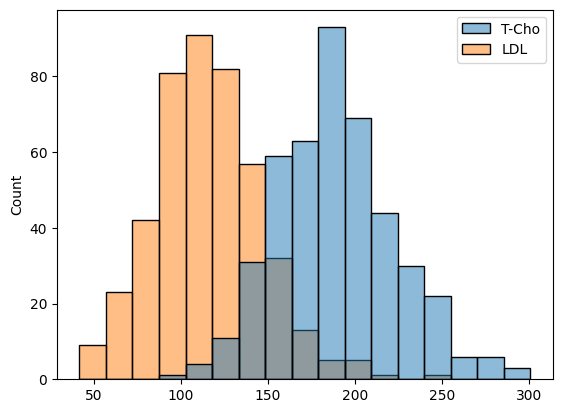

In [165]:
# ヒストグラム
sns.histplot(df[['T-Cho','LDL']])

<Axes: >

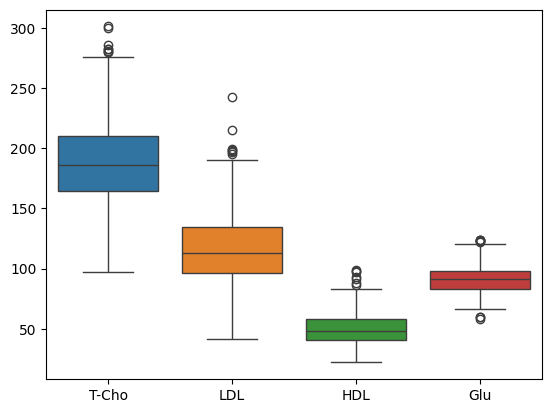

In [161]:
# 箱ひげ図
sns.boxplot(df[['T-Cho', 'LDL', 'HDL', 'Glu']])

<Axes: >

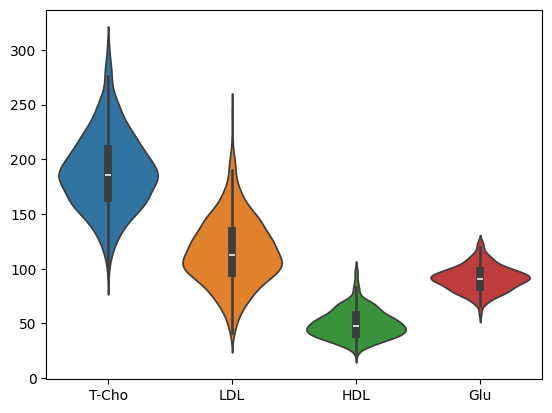

In [162]:
sns.violinplot(df[['T-Cho', 'LDL', 'HDL', 'Glu']])

<Axes: xlabel='BMI', ylabel='Glu'>

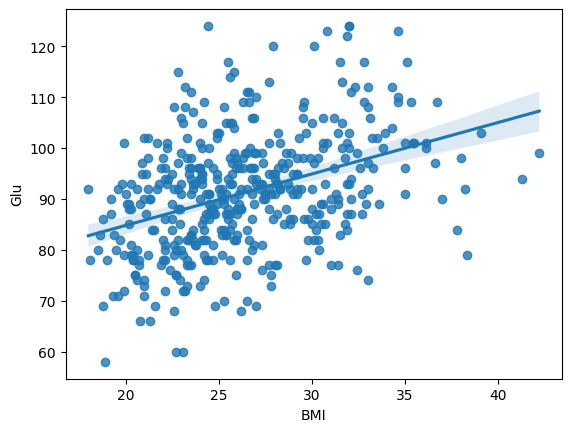

In [180]:
sns.regplot(data=df, x='BMI', y='Glu')

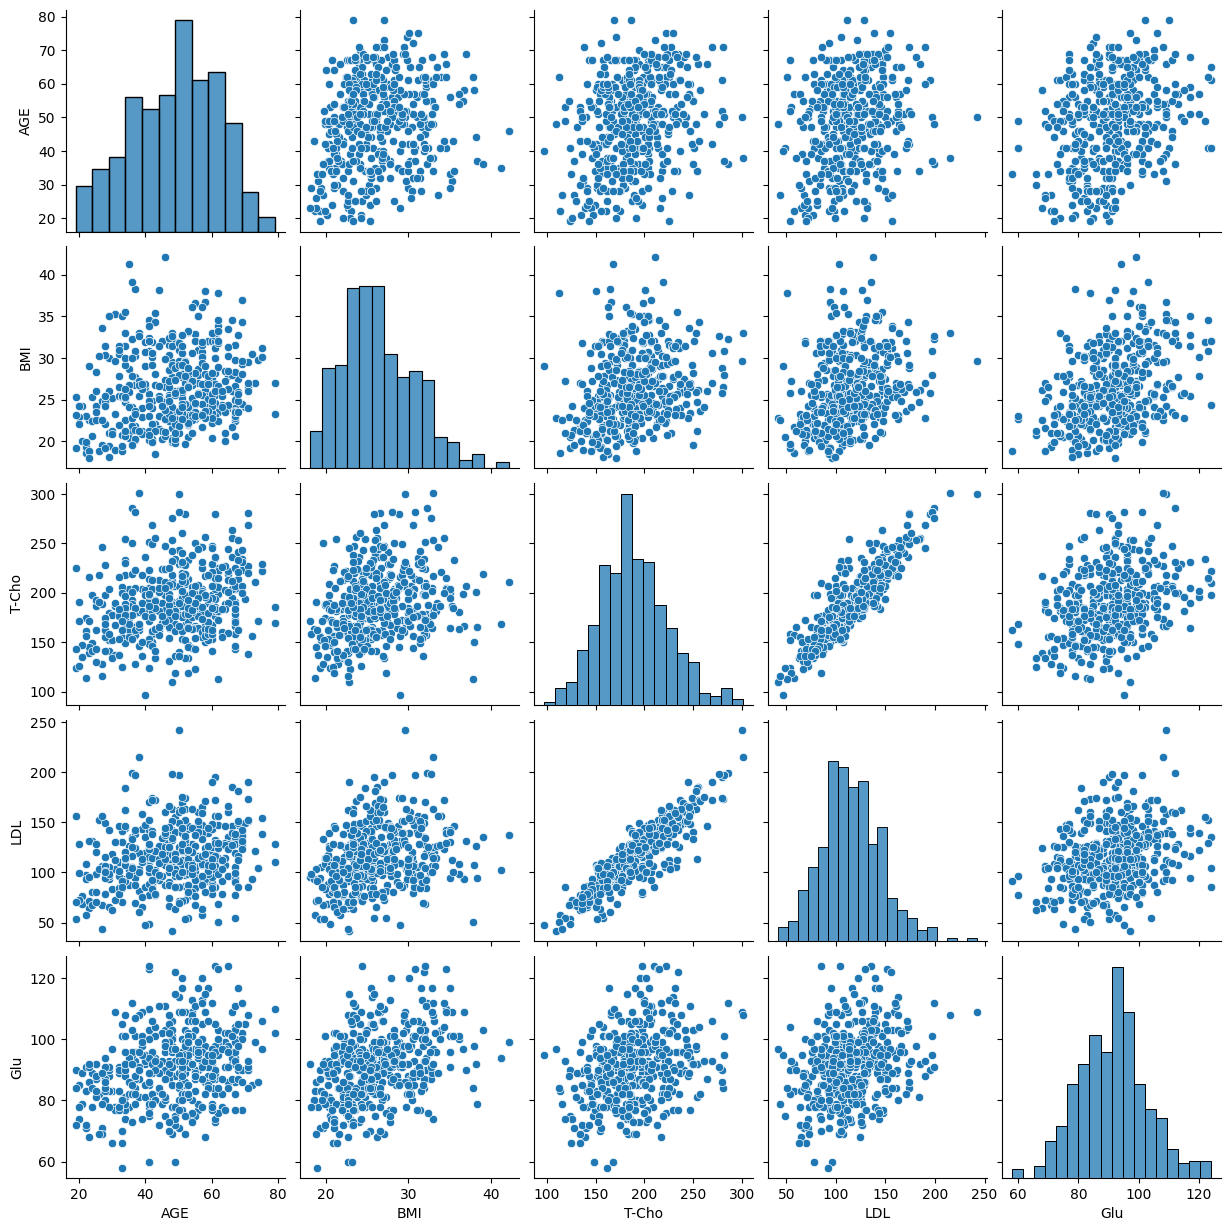

In [183]:
sns.pairplot(df[['AGE','BMI','T-Cho','LDL','Glu']])

- relplot の使い方は比較的簡単
```
sns.relplot(data=データフレーム,
            x=x軸に使いたいカラム,
            y=y軸に使いたいカラム,
            hue=色を変えたいカラム,
            style=グラフのプロットの形状を変えたいカラム
            size=プロットの大きさを反映したいカラム)
```

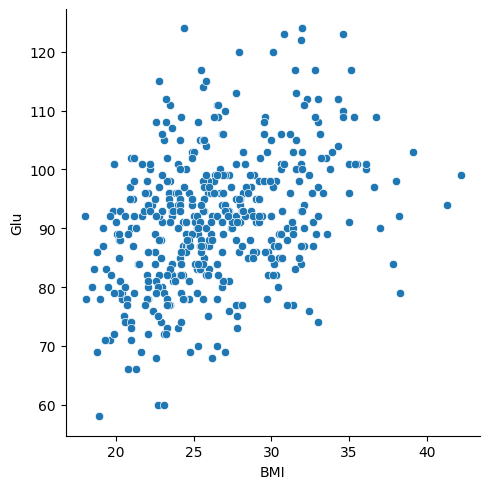

In [170]:
# シンプルに、BMI と 血糖 (Glu)の関係を図示する
sns.relplot(data=df, x='BMI',y='Glu')

In [172]:
df['HC'] = df['T-Cho']>220
df.head()

,AGE,SEX,BMI,BP,T-Cho,LDL,HDL,T-Cho_over_HDL,Log_TG,Glu,Y,HC
ID,,,,,,,,,,,,
sub001,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,False
sub002,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,False
sub003,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,False
sub004,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,False
sub005,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,False


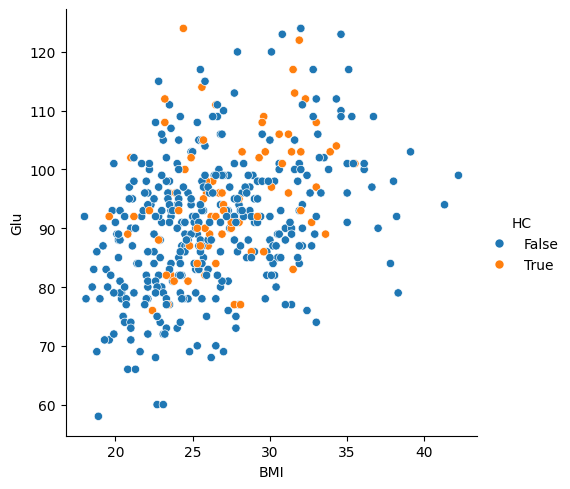

In [175]:
# hue を使うと、グループを色分けできる
# 今、高コレステロール血症の有無 でグループを色分けする
sns.relplot(data=df, x='BMI',y='Glu', hue='HC')

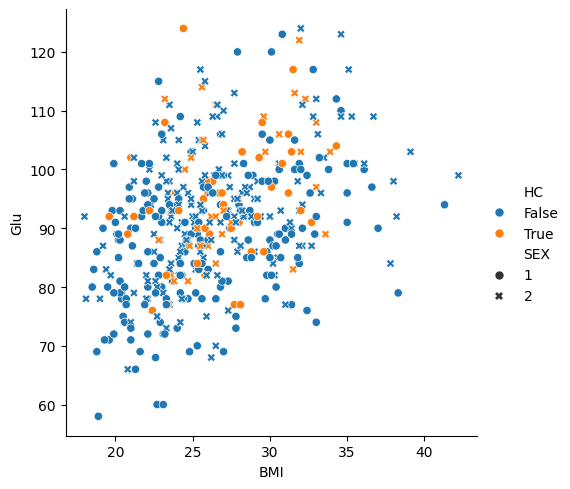

In [177]:
# style を使うと、グループをプロットの形で判別できる
# 今、Gender で 男性と女性の形状を変えたい
sns.relplot(data=df, x='BMI',y='Glu', hue='HC', style='SEX')

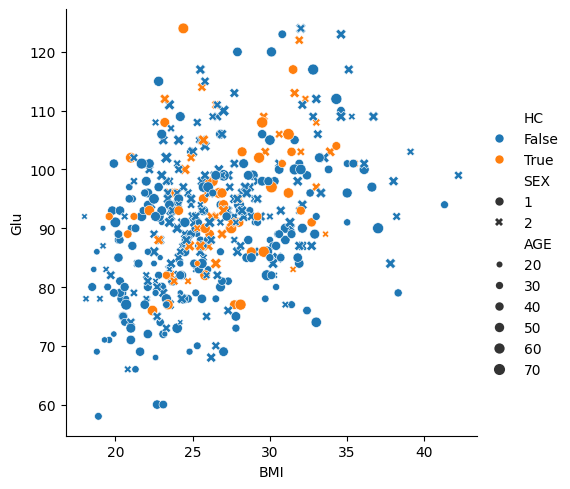

In [186]:
# sizeを使うと、ひとつひとつのプロットの大きさを変えられる
# プロットに 脳脊髄液容積の値を反映させたい
# CSF の数値をプロットの大きさに反映する
sns.relplot(data=df, x="BMI", y="Glu",hue="HC",style="SEX",size="AGE")

### 練習問題 3
- 加齢と脳脊髄液(CSF)容積の関係をプロットしたいと思います。
- その際、以下の項目を色・形状で分けたいと思います
    - 性別: 色
    - 健常者/患者: 形状
- 上記を参考に以下のようにしてください
- data: df
- x軸: Age
- y軸: CSF
- hue: Gender
- style: Subject_Type
- (sizeは使いません)

In [ ]:
# あなたの回答
sns.relplot(ここにパラメータを記載してください)

In [ ]:
# 回答例
sns.relplot(data=df, x="Age", y="CSF",hue="Gender",style="Subject_Type",)